In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
piracy_df_original = pd.read_csv('Data_Files\[Clean] IMO Piracy - 2000 to 2022 (PDV 01-2023).csv')
# pd.concat([piracy_df_original.head(), piracy_df_original.tail()])
piracy_df_original.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     3/18/2010  AL-ASA'A     Yemen      Dhow  In international waters   

   Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0       NaN        NaN        Ship Hijacked          Not Stated  Not Stated   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                      True   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted  
0                False               False                  False

In [29]:
#piracy_df_original['Part of Ship Raided'].value_counts()

In [30]:
#piracy_df_original['Consequences to Crew'].value_counts()

In [31]:
#piracy_df_original['Flag - Crew Injuries'].value_counts()

In [32]:
#piracy_df_original['Flag - Crew Held Hostage'].value_counts()

In [33]:
#piracy_df_original['Flag - Crew Missing'].value_counts()

In [34]:
#piracy_df_original['Flag - Crew Deaths'].value_counts()

In [35]:
#piracy_df_original['Flag - Crew Assaulted'].value_counts()

In [10]:
piracy_df_original['Ship Type'].unique()

array(['Dhow', 'Fishing vessel', 'Tanker', 'Supply ship',
       'General cargo ship', 'Tug', 'Container ship', 'Yacht',
       'Bulk carrier', 'Chemical tanker', 'General dry cargo ship',
       'Not Reported', 'Vehicle carrier', 'Ro-ro-cargo ship',
       'Oil product tanker', 'Product tanker',
       'Mobile offshore drilling unit', 'Barge carrier', 'LPG tanker',
       'Oil tanker', 'Rescue/standby ship', 'Refrigerated cargo carrier',
       'Livestock carrier', 'Passenger ship', 'Special purpose ship',
       'Ro-Ro-cargo ship', 'Gas carrier-LPG', 'Reefer', 'Landing craft',
       'Cable-Layer', 'Ore/bulk/oil carrier', 'Barge', 'Fishing trawler',
       'Heavy load carrier', 'Gas carrier - LNG', 'Chemical Tanker',
       'Ore/bulk/oil Carrier', 'Research ship', 'Multi purpose ship',
       'Cutter/dredger', 'Container', 'Refrigerated ship',
       'Fishing vessels', 'Product Tanker', 'Boat', 'Unknown',
       'Barter Trade Boat', 'LPG', 'Oil Tanker', 'Ferry',
       'Cement carrie

In [11]:
piracy_df_map = piracy_df_original.dropna(subset=['Latitude','Longitude']) #drop lat/long nulls for a map

In [12]:
severe_df = piracy_df_map[(piracy_df_map['Flag - Crew Deaths'] == True) | (piracy_df_map['Flag - Crew Missing'] == True)]

In [13]:
medium_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == True) | (piracy_df_map['Flag - Crew Injuries'] == True) | (piracy_df_map['Flag - Crew Held Hostage'] == True)]


In [14]:
low_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == False) & (piracy_df_map['Flag - Crew Injuries'] == False) & (piracy_df_map['Flag - Crew Held Hostage'] == False) & (piracy_df_map['Flag - Crew Deaths'] == False) & (piracy_df_map['Flag - Crew Missing'] == False)]

In [48]:
import folium
from streamlit_folium import st_folium
import streamlit as st

# Create a map using Folium
map_center = [piracy_df_original['Latitude'].mean(), piracy_df_original['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for vessel type, ship status, and country
for index, row in severe_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='black', fill=True, fill_color='black', popup=popup_text).add_to(m)

for index, row in medium_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='red', fill=True, fill_color='red', popup=popup_text).add_to(m)

for index, row in low_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='yellow', fill=True, fill_color='yellow', popup=popup_text).add_to(m)

#example box need to figure out exact area to investigate

top_left1 = [14.6,93.0]
bottom_right1 = [-10,150]
SEasia = folium.Rectangle(bounds=[top_left1, bottom_right1], color='red', fill=False)
SEasia.add_to(m)
#legend
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 120px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     <p><strong>Legend</strong></p>
     <p><i class="fa fa-circle fa-1x" style="color:black"></i> Severe</p>
     <p><i class="fa fa-circle fa-1x" style="color:red"></i> Medium</p>
     <p><i class="fa fa-circle fa-1x" style="color:yellow"></i> Low</p>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
#m.save('piracy_map.html')



In [49]:
m

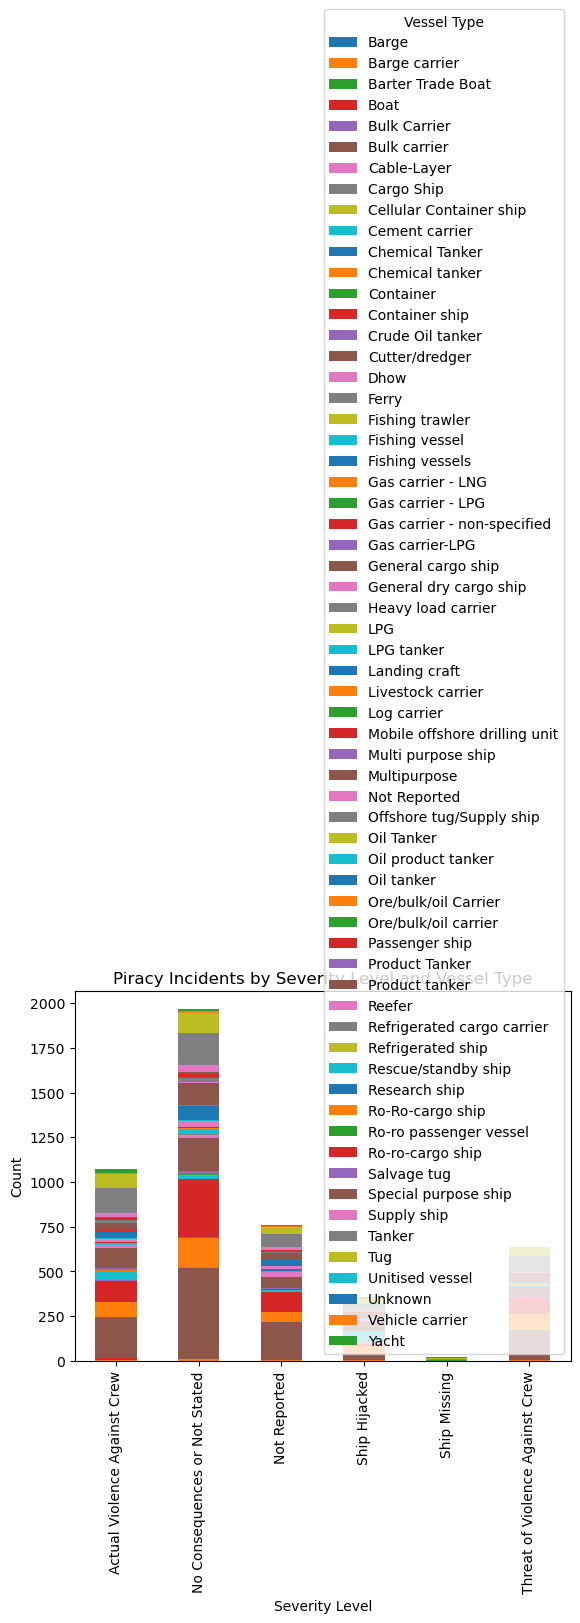

In [22]:
#big picture 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming piracy_original_df is your DataFrame containing the piracy incidents data
# Group the data by severity level and vessel type, and count the occurrences
severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Ship Type']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Type')
plt.show()

In [24]:
#sorted(piracy_df_original['Ship Type'].unique())

In [25]:
vessel_type_mapping = {
    'Cargo ships': ['General cargo ship', 'Container ship', 'Container', 'General dry cargo ship', 'Bulk carrier', 'Bulk Carrier', 
                    'Vehicle carrier', 'Ro-ro-cargo ship','Ro-Ro-cargo', 'Refrigerated cargo carrier', 
                    'Livestock carrier', 'Reefer', 'Cable-Layer', 'Ore/bulk/oil carrier', 
                    'Ore/bulk/oil Carrier',  'Cellular Container ship',
                    'Cargo Ship', 'Log carrier', 'Unitised vessel','Cement carrier','Heavy load carrier','Barge carrier'],
    
    'Fishing': ['Fishing vessel', 'Fishing trawler', 'Fishing vessels'],

    'Non commercial ships': ['Research ship','Rescue/standby ship'],

    'Passenger ships': ['Dhow','Ro-ro passenger vessel', 'Ferry', 'Passenger ship', 'Yacht'],

    'Service ships': ['Salvage tug','Tug', 'Supply ship', 'Offshore tug/Supply ship'],

    'Tankers': ['Tanker', 'Chemical tanker', 'Chemical Tanker', 'Oil product tanker', 'Product tanker', 'Product Tanker', 
                'LPG tanker', 'Oil tanker', 'Oil Tanker','Gas carrier-LPG', 'Gas carrier - LPG', 'LPG', 'Gas carrier - LNG','Gas carrier - non-specified',
                'Crude Oil tanker'],

    'All others': ['Cutter/dredger', 'Barge', 'Barge Mobile offshore drilling unit', 'Refrigerated ship', 'Boat', 'Barter Trade Boat', 
                    'Multi purpose ship','Multipurpose','Special purpose ship', 'Landing craft'],

    'Unknown': ['Not Reported', 'Unknown']}

In [58]:
# Function to map vessel types to categories
def map_vessel_type(vessel_type):
    for category, types in vessel_type_mapping.items():
        if vessel_type in types:
            return category



In [57]:
piracy_df_original['Vessel Category'] = piracy_df_original['Ship Type'].map(map_vessel_type) #map the categories to the new types 


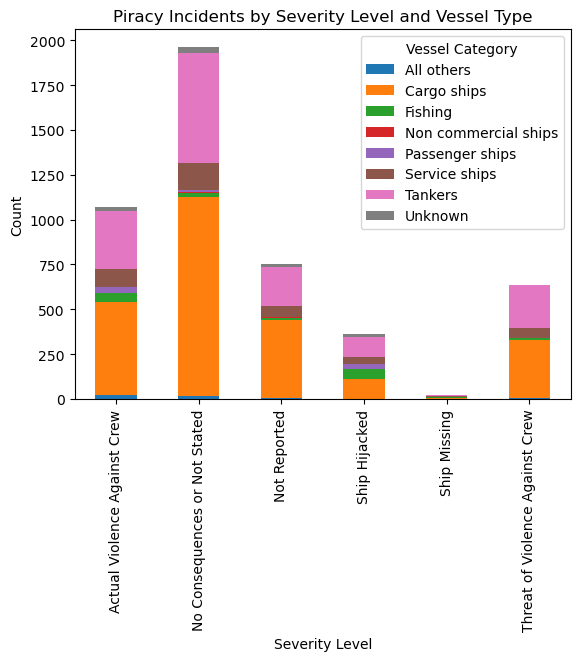

In [28]:
severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Category')
plt.show()

In [55]:
# Define the range of latitude and longitude values
#based on first example box 

min_lat = -10.0
max_lat = 15.0
min_lon = 93.0
max_lon = 150.0

# Filter the DataFrame based on the range of latitude and longitude values
SE_asia_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [56]:
SE_asia_df

Incident Date                   Ship Name            Ship Flag  \
13      11/21/2022             Wayne / Rig T20              Vanuatu   
20       1/29/2022  Hai Duong 29 (& Hakuryu 5)              Vietnam   
21        3/9/2011                  GLORY STAR              Vietnam   
23      12/19/2013                PRIME SERENE              Vietnam   
31        6/4/2010                   THULELAND       United Kingdom   
...            ...                         ...                  ...   
4805     8/20/2021                      Nefeli              Bahamas   
4806     2/27/2022              African Merlin              Bahamas   
4807     4/23/2015                HUGLI SPIRIT              Bahamas   
4808     4/26/2015                       VOLME              Bahamas   
4813      6/5/2006               PRINCESS MARY  Antigua and Barbuda   

               Ship Type                     Area   Latitude   Longitude  \
13                   Tug  In international waters   1.354333  103.293500   
20           Supply ship  In international waters   1.173167  103.478333   
21                Tanker             In port area  -6.000000  106.883333   
23       Chemical tanker  In international waters   1.316667  104.266667   
31    General cargo ship    In territorial waters  12.288333  100.761667   
...                  ...                      ...        ...         ...   
4805        Bulk carrier  In international waters   1.250000  104.108333   
4806        Bulk carrier  In international waters   1.046833  103.635167   
4807     Chemical tanker    In territorial waters   1.280833  104.189667   
4808        Bulk carrier    In territorial waters   1.263500  104.171333   
4813  General cargo ship             In port area  -5.888000  106.088167   

                 Consequences to Crew Part of Ship Raided Ship Status  \
13                       Not Reported          Not Stated    Steaming   
20                       Not Reported          Not Stated    Steaming   
21    Threat of Violence Against Crew          Not Stated  Not Stated   
23    Threat of Violence Against Crew          Not Stated    Steaming   
31      No Consequences or Not Stated          Not Stated    Steaming   
...                               ...                 ...         ...   
4805                     Not Reported         Engine Room    Steaming   
4806                     Not Reported         Engine Room    Steaming   
4807    No Consequences or Not Stated         Engine Room    Steaming   
4808    No Consequences or Not Stated         Engine Room    Steaming   
4813  Threat of Violence Against Crew         Engine Room   At Anchor   

              Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
13    None or Not Reported                 False                     False   
20    None or Not Reported                 False                     False   
21                  Knives                 False                     False   
23    None or Not Reported                 False                     False   
31    None or Not Reported                 False                     False   
...                    ...                   ...                       ...   
4805                Knives                 False                     False   
4806                Knives                 False                     False   
4807                Knives                 False                     False   
4808  None or Not Reported                 False                     False   
4813                Knives                 False                     False   

      Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted  
13                  False               False                  False  
20                  False               False                  False  
21                  False               False                  False  
23                  False               False                  False  
31                  False               False                  False  

In [60]:
SE_asia_df.loc[:,'Vessel Category'] = SE_asia_df['Ship Type'].map(map_vessel_type)


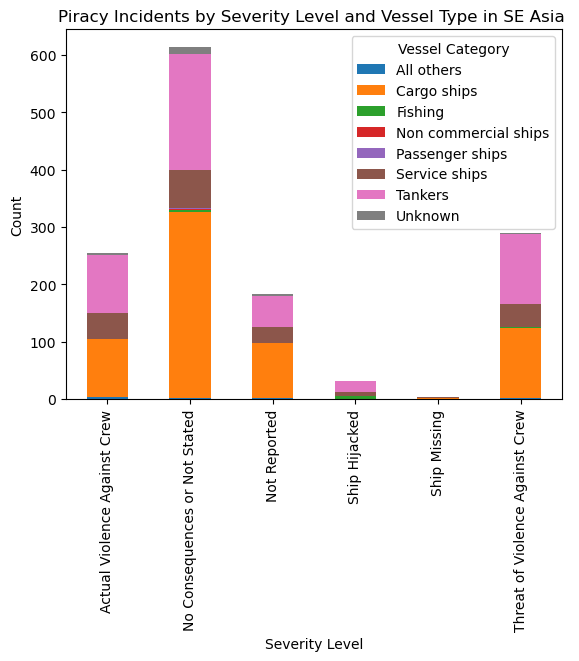

In [62]:
severity_vessel_counts = SE_asia_df.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type in SE Asia ')
plt.legend(title='Vessel Category')
plt.show()

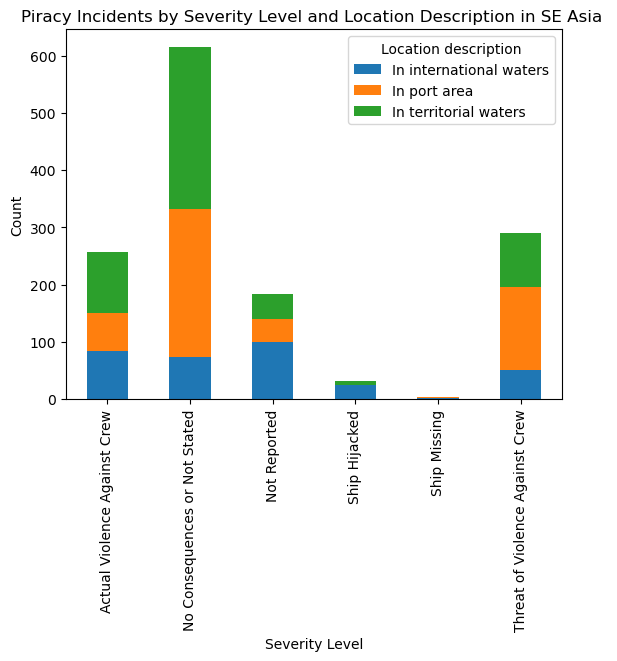

In [65]:
severity_vessel_counts = SE_asia_df.groupby(['Consequences to Crew', 'Area']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Location Description in SE Asia ')
plt.legend(title='Location description')
plt.show()

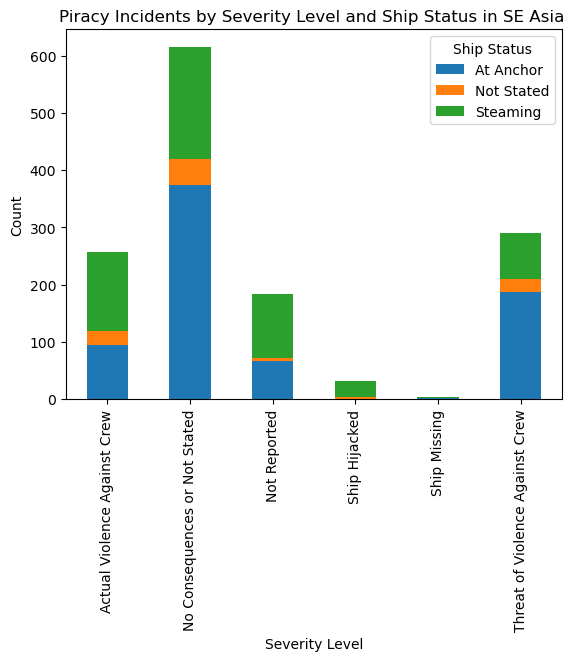

In [66]:
severity_vessel_counts = SE_asia_df.groupby(['Consequences to Crew', 'Ship Status']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Ship Status in SE Asia ')
plt.legend(title='Ship Status')
plt.show()

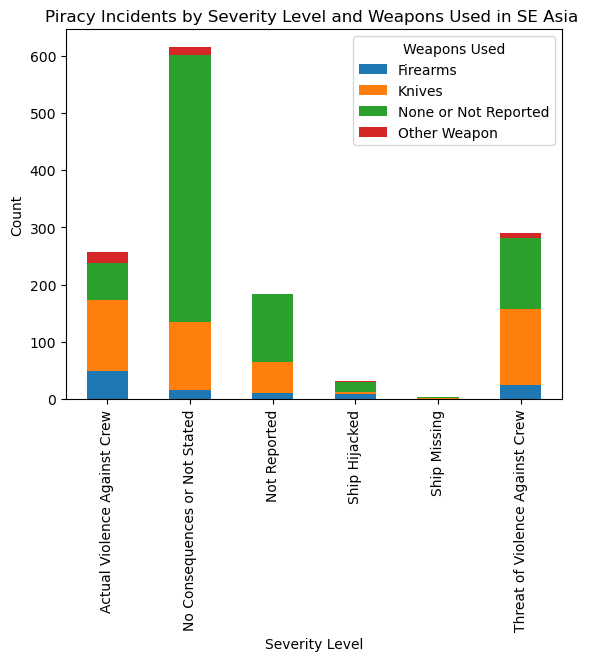

In [68]:
severity_vessel_counts = SE_asia_df.groupby(['Consequences to Crew', 'Weapons Used']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Weapons Used in SE Asia ')
plt.legend(title='Weapons Used')
plt.show()